In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
numQubits = 1
numTimeSteps = 50
numExperiments = 1000
measurementInterval = 10

In [4]:
# Initial state |ψ(0)> = 1/√2(|0⟩ + |1⟩)
initialState = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
initialState

array([0.70710678, 0.70710678])

In [5]:
# Unitary operator (rotation in the Hilbert space)
theta = np.pi / 8
theta

0.39269908169872414

In [7]:
U = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
U

array([[ 0.92387953, -0.38268343],
       [ 0.38268343,  0.92387953]])

In [8]:
# Function to evolve quantum state
def evolveState(state, U, steps):
    evolvedState = state
    for _ in range(steps):
        evolvedState = np.dot(U, evolvedState)
    return evolvedState

In [9]:
evolveState(initialState,U, measurementInterval)

array([ 1.02412061e-16, -1.00000000e+00])

In [10]:
# Function to simulate a single experiment
def simulateExperiment():
    state = initialState
    result = []
    for t in range(1, numTimeSteps + 1):
        state = np.dot(U, state)
        if t % measurementInterval == 0:
            probabilities = np.abs(state) ** 2
            outcome = np.random.choice([0,1], p = probabilities)
            result.append((t,outcome))
            # Collapse state based on measurement
            collapsedState = np.zeros_like(state)
            collapsedState[outcome] = 1
            state = collapsedState
    return result


In [11]:
totalResults = []
for expId in range(numExperiments):
    experimentResults = simulateExperiment()
    for time, outcome in experimentResults:
        totalResults.append({"Experiment": expId, "Time": time, "Outcome": outcome})

In [12]:
df = pd.DataFrame(totalResults)

In [17]:
df.head(20)

,Experiment,Time,Outcome
0,0,10,1
1,0,20,1
2,0,30,1
3,0,40,1
4,0,50,0
5,1,10,1
6,1,20,0
7,1,30,1
8,1,40,0
9,1,50,0


 *Analysis*

In [15]:
outcomeDistribution = df.groupby(['Time', 'Outcome']).size().unstack(fill_value=0)

In [16]:
outcomeDistribution

Outcome,0,1
Time,,
10,0,1000
20,519,481
30,488,512
40,495,505
50,500,500


****# 2. Compute probabilities of outcomes over time****

In [18]:
outcomeDistribution['P(0)'] = outcomeDistribution[0] / numExperiments
outcomeDistribution['P(1)'] = outcomeDistribution[1] / numExperiments

In [19]:
outcomeDistribution

Outcome,0,1,P(0),P(1)
Time,,,,
10,0,1000,0.000,1.000
20,519,481,0.519,0.481
30,488,512,0.488,0.512
40,495,505,0.495,0.505
50,500,500,0.500,0.500


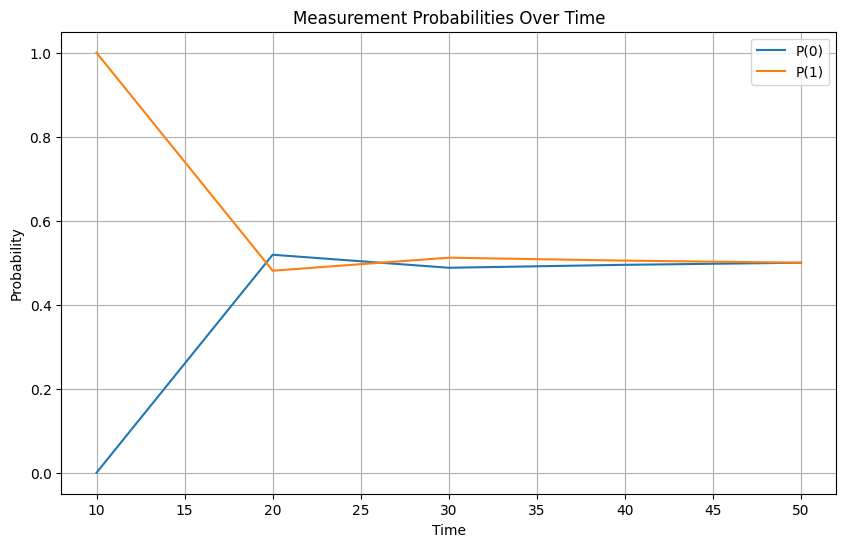

In [21]:
plt.figure(figsize=(10,6))

plt.plot(outcomeDistribution.index, outcomeDistribution['P(0)'], label = "P(0)")
plt.plot(outcomeDistribution.index, outcomeDistribution['P(1)'], label = "P(1)")
plt.title("Measurement Probabilities Over Time")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()